## Clustering (Exploratory Analysis):  Tips Dataset
### Corey Solitaire
#### 10.13.2020

#### Imports

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import wrangle_zillow

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [4]:
# df summay

wrangle_zillow.df_summary(df)

The shape of the df:
(244, 7)


Columns, Non-Null Count, Data Type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


Summary statistics for the df:
                total_bill                  tip                 size
count               244.00               244.00               244.00
mean                 19.79                 3.00                 2.57
std                   8.90                 1.38                 0.95
min                   3.07                 1.00                 1.00
25% 

13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
21.01    2
13.81    2
15.69    2
15.98    2
13.00    2
Name: total_bill, dtype: int64

----------------------------------------tip---------------------------------------- - 

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
3.50     9
1.50     9
1.00     4
1.25     3
3.48     3
Name: tip, dtype: int64

----------------------------------------sex---------------------------------------- - 

Male      157
Female     87
Name: sex, dtype: int64

----------------------------------------smoker---------------------------------------- - 

No     151
Yes     93
Name: smoker, dtype: int64

----------------------------------------day---------------------------------------- - 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

----------------------------------------time---------------------------------------- - 

Dinner    176
Lunch      68
Name: time, dtype: int64

----------------------------------------size---------------------------------------- - 

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [5]:
# df quartiles and outliers

wrangle_zillow.quartiles_and_outliers(df)

~~~
total_bill_outliers
count                   9.00
mean                    5.27
std                     3.56
min                     0.25
25%                     2.81
50%                     5.05
75%                     7.97
max                    10.51
Name: total_bill_outliers, dtype: float64
~~~
tip_outliers
count                   9.00
mean                    1.31
std                     1.40
min                     0.01
25%                     0.59
50%                     0.79
75%                     1.67
max                     4.09
Name: tip_outliers, dtype: float64
~~~
size_outliers
count                   9.00
mean                    0.94
std                     0.53
min                     0.50
25%                     0.50
50%                     0.50
75%                     1.50
max                     1.50
Name: size_outliers, dtype: float64


In [6]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size,total_bill_outliers,tip_outliers,size_outliers
0,16.99,1.01,Female,No,Sun,Dinner,2,0.00,0.00,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_bill           244 non-null    float64 
 1   tip                  244 non-null    float64 
 2   sex                  244 non-null    category
 3   smoker               244 non-null    category
 4   day                  244 non-null    category
 5   time                 244 non-null    category
 6   size                 244 non-null    int64   
 7   total_bill_outliers  244 non-null    float64 
 8   tip_outliers         244 non-null    float64 
 9   size_outliers        244 non-null    float64 
dtypes: category(4), float64(5), int64(1)
memory usage: 13.0 KB


In [8]:
def cat_variables(df):
    '''
    This function turns all categorical variables in to cat code columns
    '''
    for col_name in df.columns:
        if(df[col_name].dtype == 'object'):
            df[col_name]= df[col_name].astype('category')
            df[col_name] = df[col_name].cat.codes
        else:
            df[col_name]= df[col_name].astype('category')
            df[col_name] = df[col_name].cat.codes
    return df

In [9]:
cat_variables(df)

,total_bill,tip,sex,smoker,day,time,size,total_bill_outliers,tip_outliers,size_outliers
0,102,1,1,1,3,1,1,0,0,0
1,21,18,0,1,3,1,2,0,0,0
2,147,83,0,1,3,1,2,0,0,0
3,163,77,0,1,3,1,1,0,0,0
4,171,87,1,1,3,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...
239,193,115,0,1,2,1,2,0,1,0
240,185,31,1,0,2,1,1,0,0,0
241,156,31,0,0,2,1,1,0,0,0
242,113,23,0,1,2,1,1,0,0,0


In [10]:
# Split Dataset before Explore

train, validate, test = wrangle_zillow.split_df(df)
train.shape, validate.shape, test.shape

((136, 10), (59, 10), (49, 10))

In [11]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_outliers,tip_outliers,size_outliers
18,101,83,1,1,3,1,2,0,0,0
172,2,108,0,0,3,1,1,0,0,0
118,40,25,1,1,0,0,1,0,0,0
28,151,99,0,1,2,1,1,0,0,0
237,206,3,0,0,2,1,1,0,0,0


In [12]:
def plot_variable_pairs(df):
    '''
    Function that plots all of the pairwise relationships along with the regression line for each pair
    '''
    g = sns.PairGrid(df)    
    g.map_diag(sns.distplot)  
    g.map_offdiag(sns.regplot)
    plt.show()
    return g

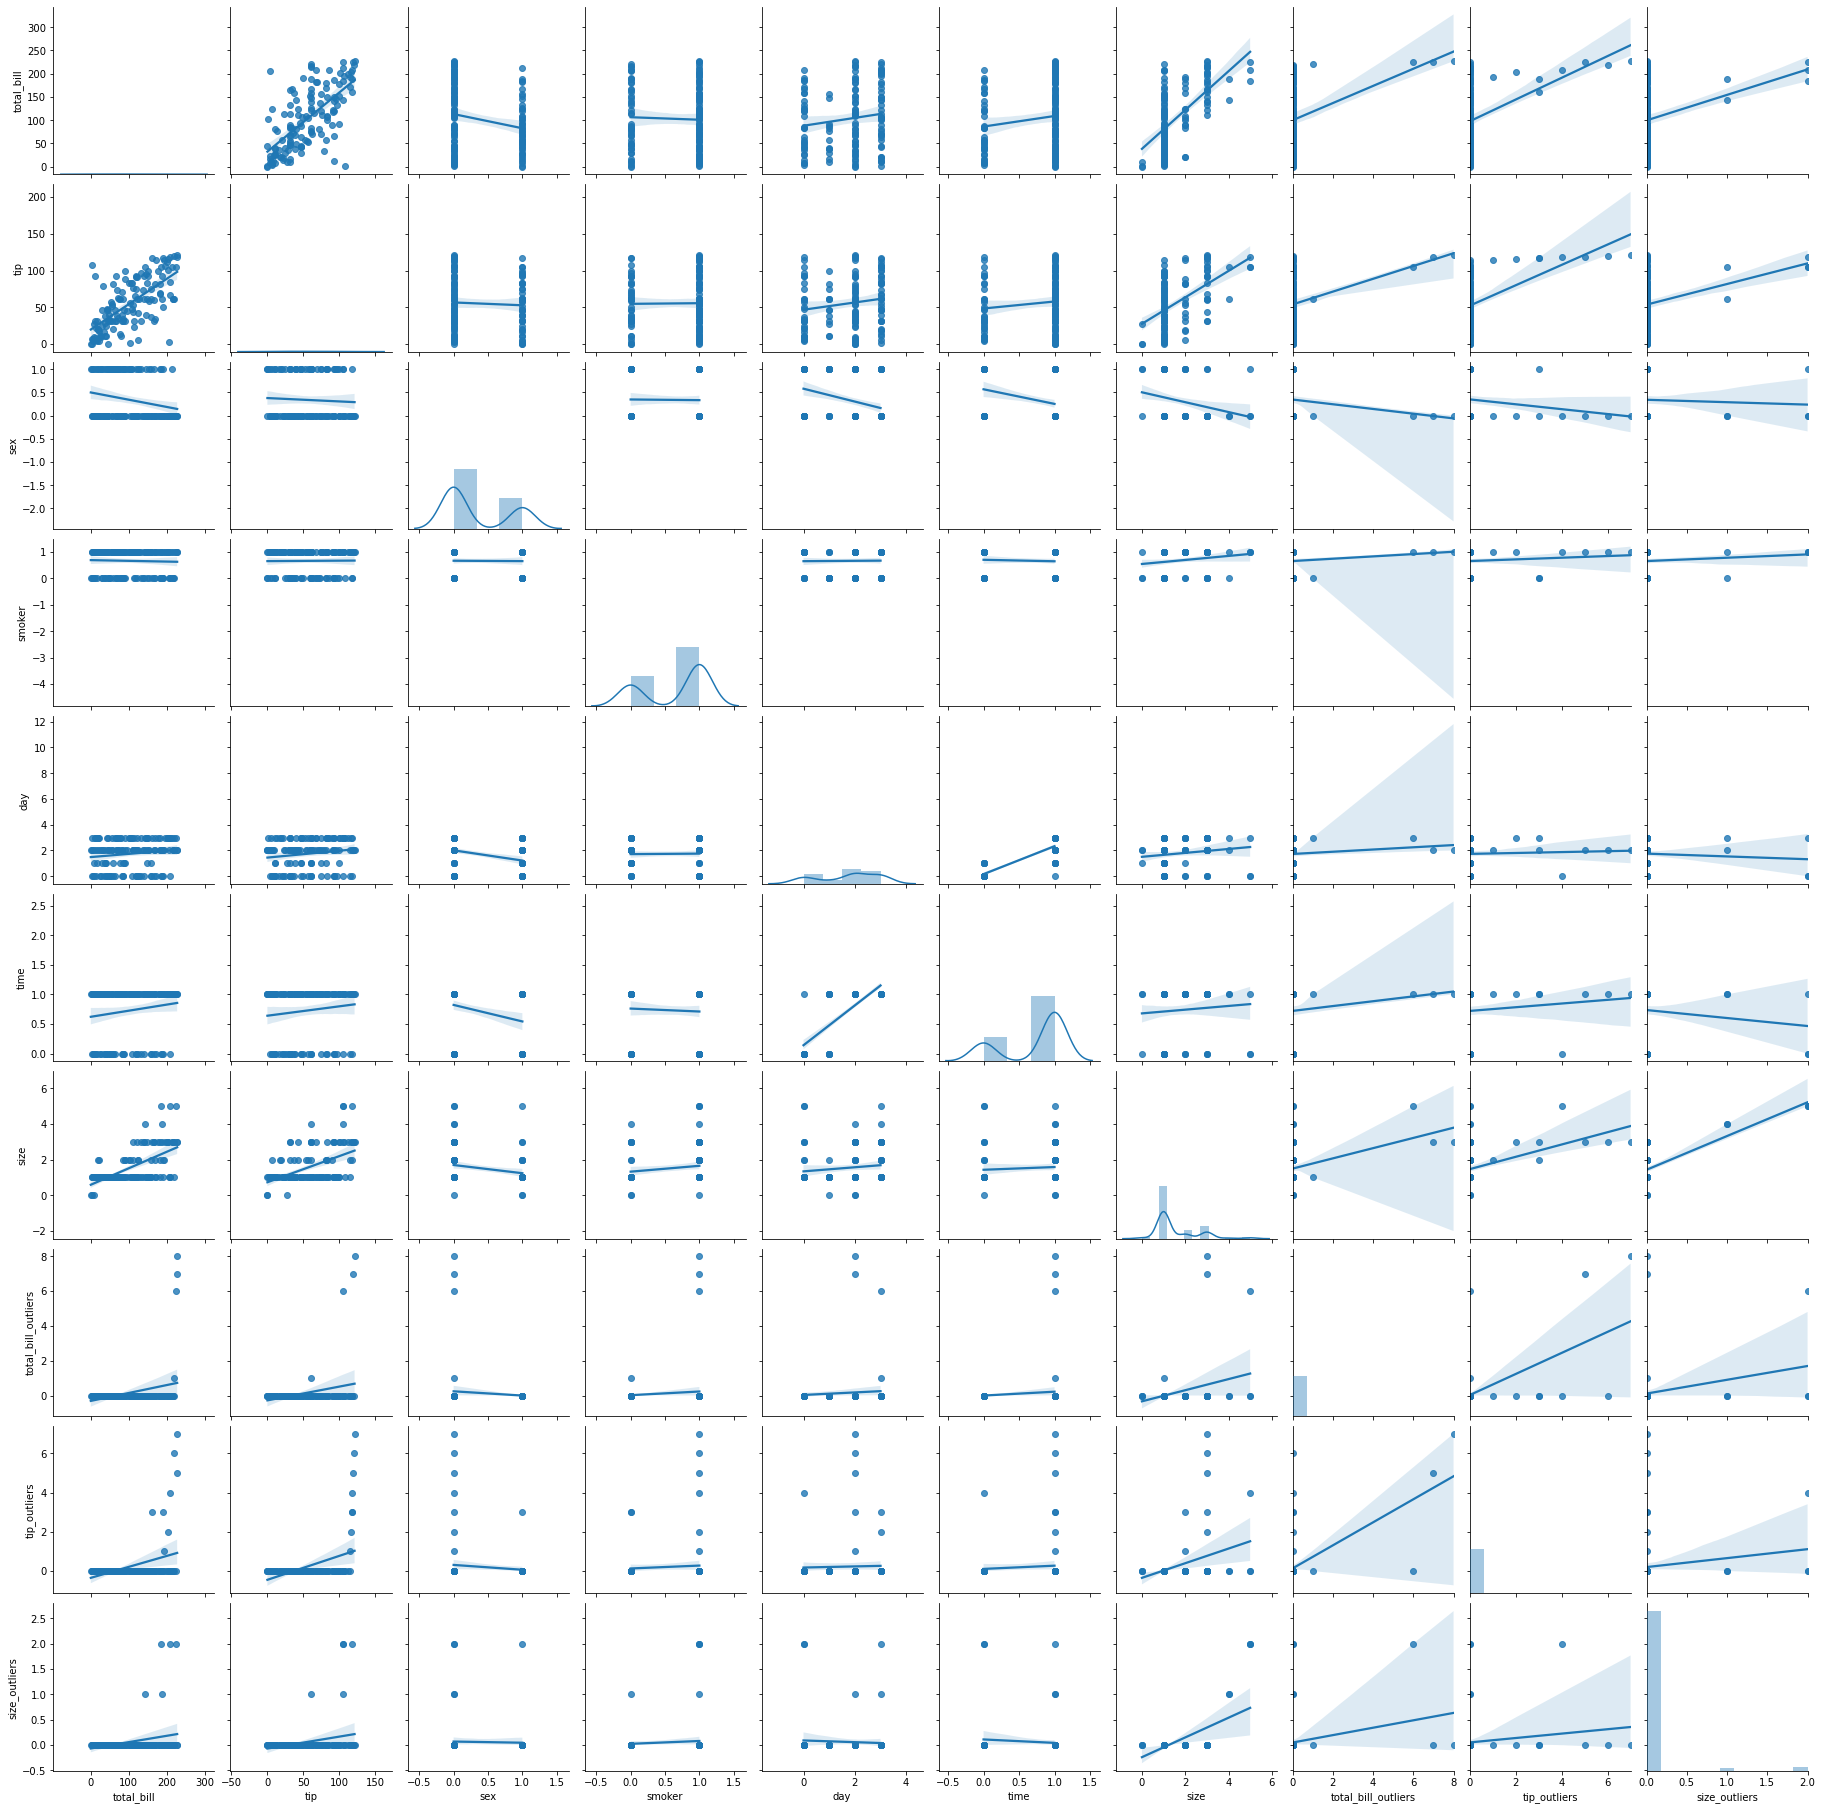

In [13]:
plot_variable_pairs(train)